In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

### Green Diode Laser
### Green Laser wavelength (expanding)
#### $$λ_{green\_expanding} = \frac{2 \Delta D}{fn}$$
#### $$ \Delta D = \frac{fλ}{2} n $$

In [6]:
f = 20
data = pd.DataFrame()
data['n'] = np.arange(0,221,20)
data['D (mm)'] = [26.1, 25.98, 25.86, 25.75, 25.64, 25.53,
                 25.41, 25.29, 25.16, 25.05, 24.93, 24.81]
data['ΔD (mm)'] = data.loc[0,'D (mm)'] - data['D (mm)'] 

data.to_csv('green_expanding_diode_laser.csv', index = False)
data

,n,D (mm),ΔD (mm)
0,0,26.10,0.00
1,20,25.98,0.12
2,40,25.86,0.24
3,60,25.75,0.35
4,80,25.64,0.46
5,100,25.53,0.57
6,120,25.41,0.69
7,140,25.29,0.81
8,160,25.16,0.94
9,180,25.05,1.05


#### $$y = mx$$ 
#### $$regression$$

λ = 5.831027667974102e-07


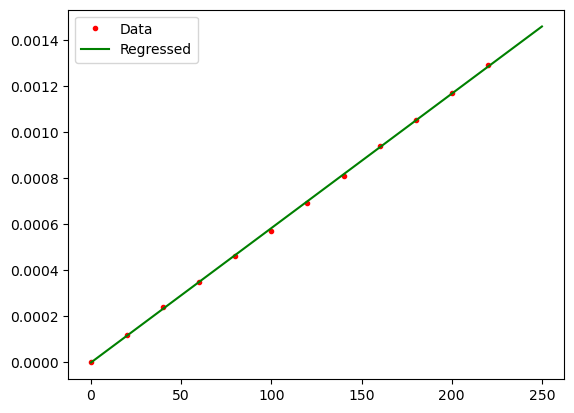

In [7]:
x = data['n'].to_numpy()
y = data['ΔD (mm)'].to_numpy()*1e-3

def formula(n,λ):
    return 0.5*f*λ*n

para, para_cov = curve_fit(formula, x, y, [500e-9])
λ = para[0]
print('λ =', λ)

x_reg = np.linspace(0,250,125)
y_reg = formula(x_reg, λ)

plt.plot(x,y,'.', color = "red", label = "Data")
plt.plot(x_reg,y_reg, '-', color = "green", label = "Regressed")
plt.legend()
plt.show()